## Final Project Submission

Please fill out:
* Student name: DENNIS MWENDA KIMATHI
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


In [222]:
# Your code here - remember to use markdown cells for comments as well!


## Overview

This project uses data analysis to recommend movie genres that would be successful for Microsoft in the streaming era. We'll analyze trends, audience preferences, and competition to give Microsoft actionable insights on what films to make.

# The datasets/database used:
tn.movie_budgets.csv 

bom.movie_gross.csv

rt.movie.tsv

im.db datbase


# Importing relavant libraries

In [223]:
import pandas as pd
import sqlite3
import csv
import numpy as np

#importing data visualisation tools
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Exploring the Datasets


In [224]:
#Reading the tn.movie_budgets dataset
movies_budget = pd.read_csv("zippedData/tn.movie_budgets.csv")
movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [225]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [226]:
# creating a function to change the last three columns dtypes
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

movies_budget[['production_budget', 'domestic_gross', 'worldwide_gross']] = movies_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].applymap(clean_currency).astype(float)

In [227]:
#converting release_date column object to datetime 
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'])
#creating a new column year 
movies_budget['year'] = movies_budget['release_date'].dt.strftime('%Y')
movies_budget.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015


In [228]:
#assigning the variable has_nans to the .isna()
has_nans = movies_budget.isna()

# Check if there are any `NaN` values in the DataFrame
if has_nans.any().any():
    print("The DataFrame contains `NaN` values.")
else:
    print("The DataFrame does not contain `NaN` values.")

The DataFrame does not contain `NaN` values.


In [229]:
#checking to for any duplicates
movies_budget.duplicated().value_counts()

False    5782
dtype: int64

In [230]:
# Engineered a new feature profit for the production of various movies
movies_budget['profit'] = movies_budget['domestic_gross'] - movies_budget['production_budget']

In [231]:
#sort the dataset based on the year from assending order and set the id as index
df_sorted = movies_budget.sort_values(by='year')
df_sorted.set_index('id', inplace=True)

In [232]:

#Remove rows with 0.0 values based on th domestic_gross and production_budget columns
df_cleaned = df_sorted[(df_sorted['domestic_gross'] != 0.0) & (df_sorted['production_budget'] != 0.0)]

# This will remove rows where both "domestic_gross" and "production_budget" columns have 0.0 values
#print(df_cleaned.head())

#change year column to int
df_cleaned['year'] = df_cleaned['year'].astype(int)

#drop rows which are not between the years 2015 and 2022
df_cleaned = df_cleaned[(df_cleaned['year'] >= 2015) & (df_cleaned['year'] <= 2022)]

#change to dataframe
df = pd.DataFrame(df_cleaned)
df


<ipython-input-232-1147956b22ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['year'].astype(int)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit
id,,,,,,,
41,2015-06-19,Manglehorn,4000000.0,132270.0,797439.0,2015,-3867730.0
27,2015-10-30,Burnt,20000000.0,13651946.0,36773510.0,2015,-6348054.0
20,2015-04-24,Yi ge ren de wu lin,25000000.0,129115.0,129115.0,2015,-24870885.0
72,2015-08-21,American Ultra,28000000.0,14439985.0,30295028.0,2015,-13560015.0
2,2015-03-06,Road Hard,1500000.0,113169.0,113169.0,2015,-1386831.0
...,...,...,...,...,...,...,...
94,2019-03-15,Wonder Park,100000000.0,45216793.0,115149422.0,2019,-54783207.0
97,2019-03-15,Captive State,25000000.0,5958315.0,8993300.0,2019,-19041685.0
33,2019-03-29,Unplanned,6000000.0,18107621.0,18107621.0,2019,12107621.0


## 2. 2nd dataset

In [233]:
#reading the bom.movie_gross dataset
movies_gross = pd.read_csv("zippedData/bom.movie_gross.csv")
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [234]:
#find the shape of the dataset
movies_gross.shape

(3387, 5)

In [235]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [236]:
#assigning the variable has_nans to the .isna()
has_nans = movies_gross.isna()

# Check if there are any `NaN` values in the DataFrame
if has_nans.any().any():
    print("The DataFrame contains `NaN` values.")
else:
    print("The DataFrame does not contain `NaN` values.")

The DataFrame contains `NaN` values.


In [237]:
#drop the rows without gross values
movies_gross.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
movies_gross.isna().sum()

title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## 3. 3rd Dataset

In [238]:
#loading a Tsv file einto pandas
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t',encoding='latin-1')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [239]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [240]:
#drop all missing values/nan values in rows
movie_info.dropna(inplace= True)

In [241]:
movie_info.head()
#movie_info.shape

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


## 4. Reading sql (im.db) database

In [242]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [243]:
# find the tables in im.db
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch results and store in table_names
table_names = cur.fetchall()
table_names
# The im.bd has 8 tables whereby movie_basics and ratings will be relavant for the study and anaysis

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [244]:
#reading from movie_basics table
moviebasics = pd.read_sql_query("""SELECT * 
FROM movie_basics
;""",conn)

moviebasics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [245]:
#reading from movie_ratings table
movieratings = pd.read_sql_query("""SELECT * 
FROM movie_ratings
;""",conn)

movieratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [246]:
#join the two tables movie_basics with movie_ratings using the movie_id column
ratings = pd.read_sql_query("""
SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)

;""", conn)
#LIMIT 10
ratings.head(10)

,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


In [247]:
#readign another table movie_akas
movie_akas = pd.read_sql_query("""SELECT * 
FROM movie_akas
;""",conn)

movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [248]:
movie_akas['language'].unique()
movie_akas['language'].value_counts().head(10)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
Name: language, dtype: int64

# Merging various datasets

In [249]:
#rename the columns to merge

movies_gross.rename(columns={'title':'movie'}, inplace=True)
moviebasics.rename(columns={'original_title':'movie'},inplace=True)
ratings.rename(columns={'primary_title':'movie'},inplace=True)

In [250]:
# merge the movie_gross dataset with movies_budgets datasets

df_budget_and_gross = movies_budget.merge(movies_gross, how = 'inner', on ='movie')


In [251]:
df_budget_and_gross

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,profit,studio,domestic_gross_y,foreign_gross,year_y
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,BV,678800000.0,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,-99925825.0,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,50,2010-10-29,Monsters,500000.0,237301.0,5.639730e+06,2010,-262699.0,Magn.,237000.0,4000000,2010
1080,17,2001-07-27,Jackpot,400000.0,44452.0,4.445200e+04,2001,-355548.0,DR,800.0,1100000,2014
1081,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,3145391.0,ParV,3400000.0,336000,2011
1082,48,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,2011,1146194.0,FoxS,1300000.0,456000,2011


In [252]:
#assigning the variable has_nans to the .isna()
has_nans = df_budget_and_gross.isna()

# Check if there are any `NaN` values in the DataFrame
if has_nans.any().any():
    print("The DataFrame contains `NaN` values.")
else:
    print("The DataFrame does not contain `NaN` values.")

The DataFrame contains `NaN` values.


In [253]:
# Drop specific columns
df_dropped = df_budget_and_gross.drop(['domestic_gross_y', 'year_x'], axis=1)

# Rename columns
df_renamed = df_dropped.rename(columns={'domestic_gross_x': 'domestic_gross', 'year_y': 'year'})

# Remove NaN values
df_no_nan = df_renamed.dropna()

#change to dataframe
df = pd.DataFrame(df_no_nan)

#drop rows which are not between the years 2015 and 2022
df_cleaned = df[(df['year'] >= 2015) & (df['year'] <= 2022)]

In [254]:
#set the id column as index
df_cleaned.set_index('id',inplace=True)

In [255]:
df_cleaned.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,studio,foreign_gross,year
id,,,,,,,,,
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,BV,946400000,2015
7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,BV,"1,369.5",2018
9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,-70975705.0,WB,428900000,2017
10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,-99925825.0,Sony,680600000,2015
12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,-61232488.0,BV,179200000,2018


In [256]:
# Merge two tables from the im.db database
movie_info_sumarry = ratings.merge(movie_akas, how = 'inner', on ='movie_id')

In [257]:
movie_info_sumarry

,movie,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,Pengalila,tt9905462,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,en,None,literal English title,0.0
261802,Pengalila,tt9905462,2019,111.0,Drama,8.4,600,3,Pengalila,IN,None,None,None,0.0
261803,Padmavyuhathile Abhimanyu,tt9911774,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0
261804,Padmavyuhathile Abhimanyu,tt9911774,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0


In [258]:
#remove the duplicates
movie_info_sumarry.drop_duplicates(subset='movie', inplace=True)

# drop columns
drop_cols = movie_info_sumarry.drop(columns = ['attributes','is_original_title','region','types','ordering'])

#remove rows with NaN values
remove_Nan = drop_cols.dropna()
remove_Nan.tail()

,movie,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,language
261715,Trinity Seven: The Movie 2 - Heavens Library &...,tt9826484,2019,63.0,"Action,Animation,Comedy",6.7,37,Trinity Seven: The Movie 2 - Heavens Library &...,en
261723,Pian hän tulee,tt9829324,2019,69.0,Documentary,6.6,5,Waiting for Hezhwan,en
261731,Fighting Men of China,tt9844650,2018,123.0,Drama,4.0,10,Fighting Men of China,en
261786,Auntie Frog,tt9899840,2018,81.0,"Adventure,Comedy,Family",6.2,6,Auntie Frog,en
261792,Watching This Movie Is a Crime,tt9899860,2019,100.0,"Drama,Thriller",8.1,7,Watching This Movie Is a Crime,en


In [259]:
#export the combined/clean dataframe to csv
remove_Nan.to_csv('Movie summary Data.csv')

In [260]:
df_cleaned.to_csv('Finacial Movie Data.csv')

In [261]:
df1 = pd.read_csv('Finacial Movie Data.csv')
df1.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,studio,foreign_gross,year
0,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,BV,946400000,2015
1,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,BV,"1,369.5",2018
2,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,-70975705.0,WB,428900000,2017
3,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,-99925825.0,Sony,680600000,2015
4,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,-61232488.0,BV,179200000,2018
5,17,2016-05-06,Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,158084349.0,BV,745200000,2016
6,18,2016-03-25,Batman v Superman: Dawn of Justice,250000000.0,330360194.0,8.675003e+08,80360194.0,WB,543300000,2016
7,23,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,-24235235.0,Uni.,"1,010.0",2017
8,25,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,-57441124.0,BV,622300000,2017
9,33,2017-06-21,Transformers: The Last Knight,217000000.0,130168683.0,6.028933e+08,-86831317.0,Par.,475300000,2017


## Movie Related insights

In [262]:
df2 = pd.read_csv('Movie summary Data.csv')
df2.head(10)

,Unnamed: 0,movie,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,language
0,0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,Sangharsh,hi
1,5,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season,en
2,274,Jurassic World,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Джурасик свят,bg
3,531,Burnt by the Sun 2,tt0403645,2010,181.0,"Drama,History,War",4.1,3907,Burnt by the Sun 2: Intercession,en
4,588,In Secret,tt0409379,2013,107.0,"Crime,Drama,Thriller",6.2,7045,Тайната,bg
5,633,Tekken,tt0411951,2010,87.0,"Action,Crime,Drama",4.8,24913,Текен,bg
6,810,The Giver,tt0435651,2014,97.0,"Drama,Romance,Sci-Fi",6.5,104999,Le passeur,fr
7,1140,Party Crashers,tt0452664,2012,88.0,Comedy,5.4,907,Party Crashers,en
8,1405,The Only Living Boy in New York,tt0460890,2017,89.0,Drama,6.3,8727,Самотен в Ню Йорк,bg
9,1492,Komaram Puli,tt0464162,2010,163.0,"Action,Crime,Thriller",3.8,1423,Janbaaz Khiladi,hi


# what are the most populat genres

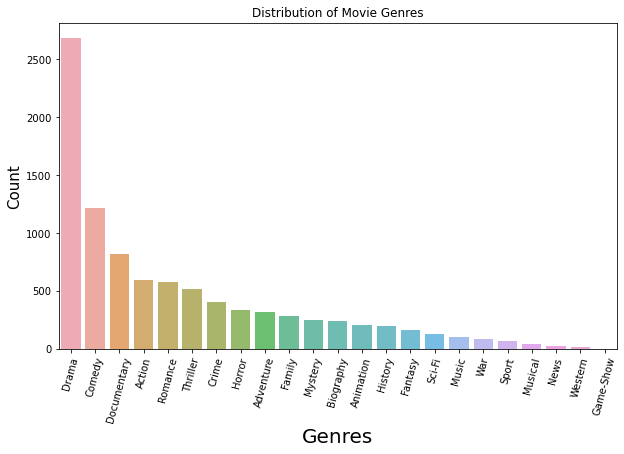

In [263]:
# Extract genres and count their occurrences
genre_counts = df2['genres'].str.split(',').explode().value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, alpha=0.8)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres',fontsize= 20)
plt.ylabel('Count',fontsize =15)

# Rotate the labels by 45 degrees
plt.xticks(rotation=75)

plt.show()

From the bar graph we can say that Drama is most popular Genre in movie industry.It has the tallest bar

The data is useful since Microsoft can major on the genre is most liked promising to bring highy results

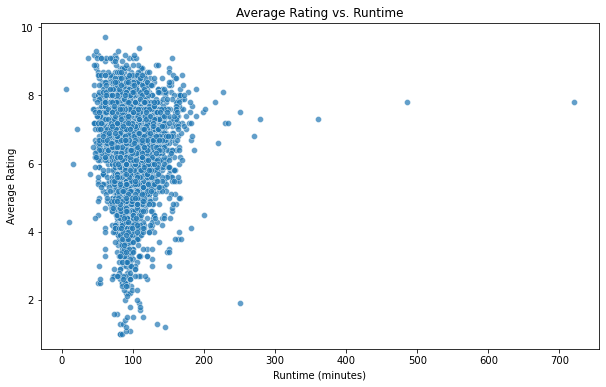

In [264]:
# Convert runtime_minutes to integer
df2['runtime_minutes'] = df2['runtime_minutes'].astype(int)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=df2, alpha=0.7)
plt.title('Average Rating vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

 The graph suggests that shorter items tend to have higher average ratings. This could be used to guide decisions on the length of future items.

Problem:
 how to improve the average rating of longer items. This could involve looking into why longer items tend to have lower ratings and addressing those issues.

>So Microsoft should not make films that 120 minutes long it will impact the rating of the film and considering others factors that will make the film have a lower rating

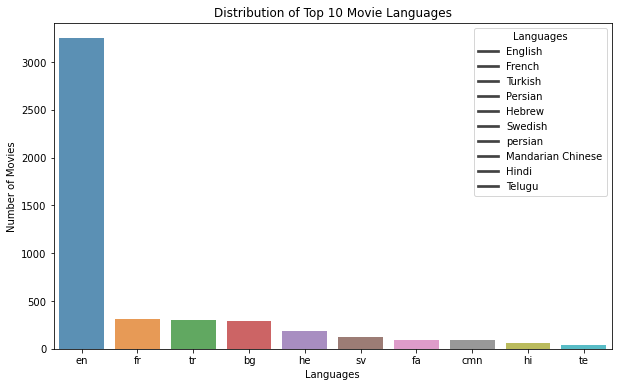

In [265]:
# Extract languages and count their occurrences
language_counts = df2['language'].value_counts()

# Filter to only include the top 10 languages
top_languages = language_counts.nlargest(10).index

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages, y=language_counts.loc[top_languages], alpha=0.8)
plt.title('Distribution of Top 10 Movie Languages')
plt.xlabel('Languages')
plt.ylabel('Number of Movies')

# Add a legend

# Add a legend with the full language names
languages = {
    "en": "English",
    "fr": "French",
    "tr": "Turkish",
    "bg": "Persian",
    "he": "Hebrew",
    "sv": "Swedish",
    "fa": "persian",
    "cmn": "Mandarian Chinese", 
    "hi": "Hindi",
    "te": "Telugu"
}

plt.legend(labels=[languages[abbr] for abbr in top_languages], title='Languages')

plt.show()

English is the most common language in the top 10 movie languages.

If Microsoft is going to deal with movies,the graph suggests that a significant portion of movies are in English.This could act to  guide decisions on the languages to focus on for subtitles, dubbing, or other localization efforts

Problem:
when dealing with other diversity languages Microsoft should ensure or that they have adequate support to make films in other languages and ensure that they make profit and their films are watched.


# Financial anlysis

In [266]:
df1 = pd.read_csv('Finacial Movie Data.csv')
df1.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,studio,foreign_gross,year
0,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,BV,946400000,2015
1,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,BV,"1,369.5",2018
2,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,-70975705.0,WB,428900000,2017


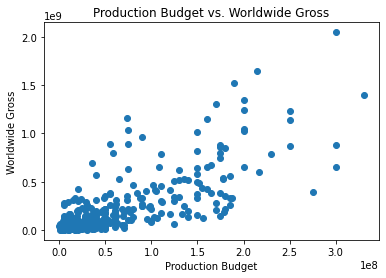

In [267]:
# Create the scatter plot
plt.scatter(df1['production_budget'], df1['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross')
plt.show()

From the data, it can be observed that the majority of the productions have a worldwide gross revenue significantly higher than their production budgets

The graph indicates that for businesses involved in movie production, raising the production budget could lead to higher worldwide gross earnings. Nevertheless, this relationship is not definite, as various factors can influence a movie's success.

One potential problem that can be inferred from this data is the risk of overspending on production budgets, which could lead to financial losses if the productions do not generate sufficient revenue

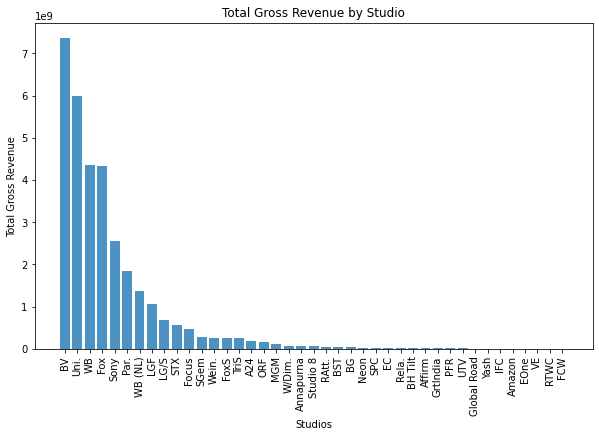

In [268]:
# bar gragh showing all the studios

# Calculate the total gross revenue by studio
total_gross_by_studio = df1.groupby('studio')['domestic_gross'].sum()

# Sort the studios by total gross revenue in descending order
sorted_total_gross_by_studio = total_gross_by_studio.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_total_gross_by_studio.index, sorted_total_gross_by_studio.values, alpha=0.8)
plt.xlabel('Studios')
plt.ylabel('Total Gross Revenue')
plt.title('Total Gross Revenue by Studio')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

No handles with labels found to put in legend.


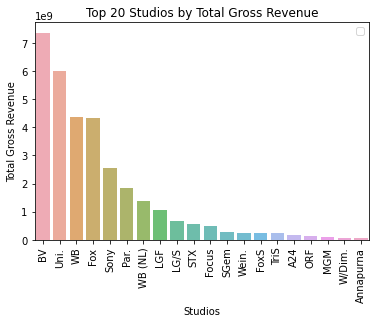

In [269]:
# bar chart showing top 20 studios

# Calculate the total gross revenue by studio
total_gross_by_studio = df1.groupby('studio')['domestic_gross'].sum()

# Sorted studios by total gross revenue in descending order
sorted_total_gross_by_studio = total_gross_by_studio.sort_values(ascending=False)

# Filter the top 20 studios
top_20_studios_by_gross = sorted_total_gross_by_studio.head(20)

# Convert the DataFrame to a seaborn-compatible format
sns_df = top_20_studios_by_gross.reset_index().rename(columns={'studio': 'Studio', 'domestic_gross': 'Total Gross Revenue'})

# Create the bar chart
sns.barplot(x='Studio', y='Total Gross Revenue', data=sns_df, alpha=0.8)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add the legend
plt.legend()

plt.title('Top 20 Studios by Total Gross Revenue')

plt.xlabel('Studios')
plt.ylabel('Total Gross Revenue')

plt.show()

Insight: The film industry is largely controlled by a handful of major studios. Notably, studios like Warner Bros., Disney (referred to as BV), and Universal (referred to as Uni.) hold a considerably larger market share than others. This revenue concentration among a select few studios may stem from factors like substantial marketing budgets, extensive distribution networks, or stronger brand recognition.

The control exerted by a limited number of major studios might hinder competition and creativity in the film industry. Smaller studios could face financial challenges, resulting in less variety in content and potentially restricting the range of movies produced.

Microsoft as a company should come in strong, both fincially,a high content creation ability in order to be one of the top studios.

## Conclusion

1.While movies with higher budgets tend to generate more profit than lower-budget ones, Microsoft should be cautious not to overspend on production budgets, as this could result in financial losses while aiming for increased profits.

2.The genres of drama, comedy, and documentaries are recommended for Microsoft to explore, as they are popular genres.

3.Microsoft should aim to keep the duration of films under 120 minutes to minimize the negative impact on ratings.

4.Producing films in English should be a priority for Microsoft.


## Recommendations
1.Microsoft can learn from Disney (BV) and Universal (Uni) as they produce top-ranking and high-grossing movies.

2.Microsoft should consider producing movies that have elements of drama and comedy.

3.Developing a robust marketing strategy is crucial for Microsoft, as popularity boosts ratings and profits.

4.Microsoft needs to excel in financial strength, marketing strategies, and content creation to establish itself as a leading studio.